In [1]:
from SIFT_gs.FIBSEM_SIFT_gs import *

Open CV version:  4.6.0
SIFT_gs version:  4.0.1


# This Notebook shows examples of workflow using already registered MRC stacks
### - setting/checking Evaluation Box
### - performing Registration Analysis
### - comparing the results of Different Registrations

# Set up DASK client

In [2]:
#start / restart client
try:
    client.restart()
except:
    client = Client()
    
# setup a window to monitor the client progress
try:
    dport = client.scheduler_info()['services']['dashboard']
except:
    dport = client.scheduler_info()['services']['bokeh']
print('Using Local Port:   ', dport)
status_update_address = 'http://localhost:{:d}/status'.format(dport)
IFrame(src=status_update_address, width='100%', height='900px')

C:\Users\labadmin\Miniconda3\envs\sandbox\lib\site-packages\distributed\bokeh\core.py:74: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


Using Local Port:    57132


# Set / Show Evaluation Box

Wall time: 13.8 s


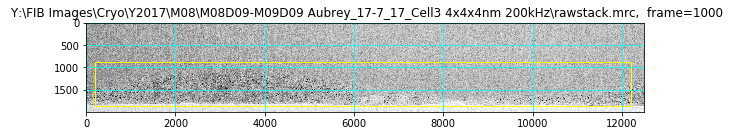

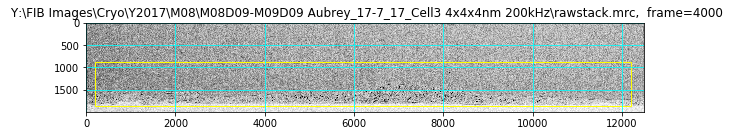

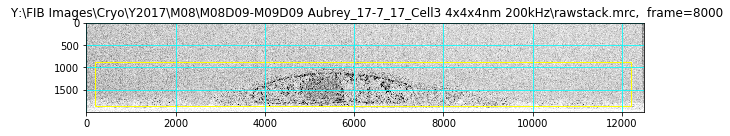

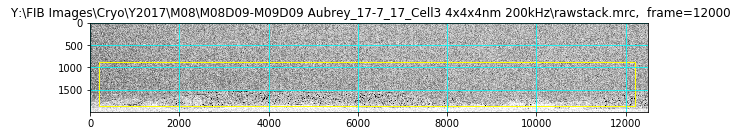

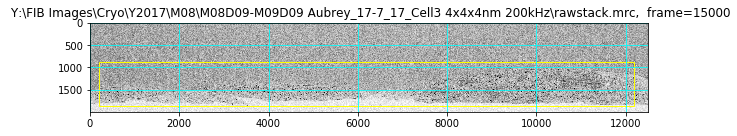

In [4]:
%%time
data_dir = 'Y:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz'
rawstack_mrc = os.path.join(data_dir, 'rawstack.mrc')
evaluation_box=[875,1000,200, 12000]
show_eval_box_mrc_stack(rawstack_mrc,
                            evaluation_box=evaluation_box,
                           frame_inds = [1000, 4000, 8000, 12000, 15000])

# Analyze the quality of Stack Registration

DASK client exists. Will perform distributed computations
Use http://localhost:57132/status to monitor DASK progress
Will use fixed evaluation box:  [875, 1000, 200, 12000]
mrc_mode=6  , dt_mrc= <class 'numpy.uint16'>
Will analyze regstrations in 16867 frames
Will save the data into Y:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz\RawStack_withEB_RegistrationQuality.xlsx
Using DASK distributed
Saving the Registration Quality Statistics into the file:  Y:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz\RawStack_withEB_RegistrationQuality.xlsx


C:\Users\labadmin\Miniconda3\envs\sandbox\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\labadmin\Miniconda3\envs\sandbox\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\labadmin\Miniconda3\envs\sandbox\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Wall time: 1h 28min 50s


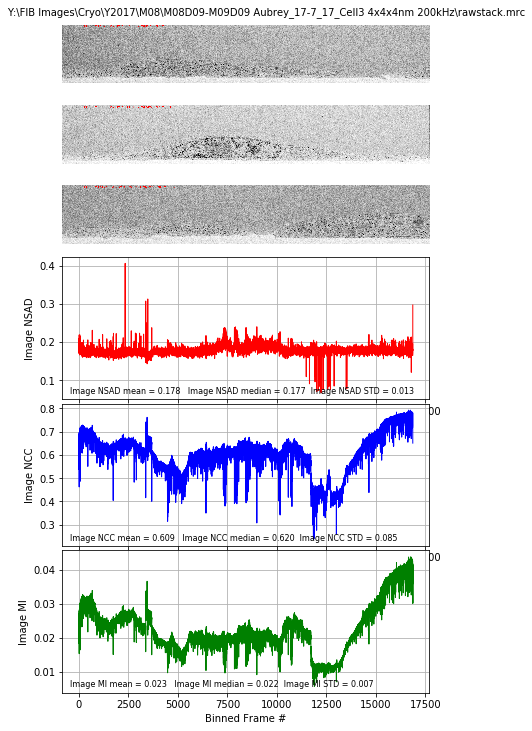

In [5]:
%%time
data_dir = 'Y:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz'
rawstack_mrc = os.path.join(data_dir, 'rawstack.mrc')
evaluation_box=[875,1000,200, 12000]
save_filename = os.path.join(data_dir, 'RawStack_withEB.mrc')
reg_results_rawstack = analyze_mrc_stack_registration(rawstack_mrc,
                                                      DASK_client = client,
                                                      evaluation_box = evaluation_box,
                                                      save_filename = save_filename)
generate_report_from_xls_registration_summary(reg_results_rawstack[1])

In [ ]:
%%time
data_dir = 'Y:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz'
evaluation_box=[300,1000,200, 12000]
orig_rot_mrc = os.path.join(data_dir, 'SIFTalignTrans-16bit-rot_0_0_6.mrc')
save_filename = os.path.join(data_dir, 'SIFTalignTrans-16bit-rot_0_0_6_withEB.mrc')
reg_results_orig_mrc_rot = analyze_mrc_stack_registration(orig_rot_mrc,
                                                          DASK_client = client,
                                                          evaluation_box = evaluation_box,
                                                          save_filename = save_filename)
generate_report_from_xls_registration_summary(reg_results_orig_mrc_rot[1])

DASK client exists. Will perform distributed computations
Use http://localhost:57132/status to monitor DASK progress
Will use fixed evaluation box:  [300, 1000, 200, 12000]
mrc_mode=6  , dt_mrc= <class 'numpy.uint16'>
Will analyze regstrations in 16867 frames
Will save the data into Y:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz\SIFTalignTrans-16bit-rot_0_0_6_withEB_RegistrationQuality.xlsx
Using DASK distributed


In [ ]:
%%time
evaluation_box=[1100,1000,200, 12000]
RegularizedAffine_mrc = os.path.join(data_dir, 'Registered_I16_RegularizedAffineTransform_RANSAC_drmax1.5_const_scls_SG_shift_subtr_padded_l2_1e-05.mrc')
save_filename = os.path.join(data_dir, 'RegularizedAffineTransform_withEB0.mrc')
reg_results_RegularizedAffine_EB0 = analyze_mrc_stack_registration(RegularizedAffine_mrc,
                                                                   DASK_client = client,
                                                                   evaluation_box = evaluation_box,
                                                                   save_filename = save_filename)
generate_report_from_xls_registration_summary(reg_results_RegularizedAffine_EB0[1])

In [ ]:
%%time
evaluation_box=[1100,1000,200, 12000]
RegularizedAffine_b045_mrc = os.path.join(data_dir, 'Y:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz\Registered_I16_RegularizedAffineTransform_RANSAC_drmax1.5_const_scls_SG_shift_subtr_padded_l2_1e-05_brat0.045.mrc')
save_filename = os.path.join(data_dir, 'RegularizedAffineTransform_b045_withEB0.mrc')
reg_results_RegularizedAffine_b045_EB0 = analyze_mrc_stack_registration(RegularizedAffine_b045_mrc,
                                                                        DASK_client = client,
                                                                        evaluation_box = evaluation_box,
                                                                        save_filename = save_filename)
generate_report_from_xls_registration_summary(reg_results_RegularizedAffine_b045_EB0[1])

# Compare Different Registrations

In [ ]:
data_dir = 'Y:/FIB Images/Cryo/Y2017/M08/M08D09-M09D09 Aubrey_17-7_17_Cell3 4x4x4nm 200kHz'
data_files = ['RawStack_withEB_RegistrationQuality.csv',
              'SIFTalignTrans-16bit-rot_0_0_6_withEB_RegistrationQuality.csv',
              'RegularizedAffineTransform_withEB0_RegistrationQuality.csv',
             'RegularizedAffineTransform_b045_withEB0_RegistrationQuality.csv']
reg_qual_fls = [os.path.join(data_dir, df) for df in data_files]
pfs = ['Raw Stack',
      'FiJi Registration',
      'Reg.Aff., λ=1e-5, ImgBx0.000, EB0',
      'Reg.Aff., λ=1e-5, ImgBx0.045, EB0']

save_filename=os.path.join(data_dir, 'Regstration_Summary_EB0_HeLa3.png')
plot_registrtion_quality_csvs(reg_qual_fls, pfs, save_filename=save_filename)